# Step 1: Import Necessary Libraries and Read the Image

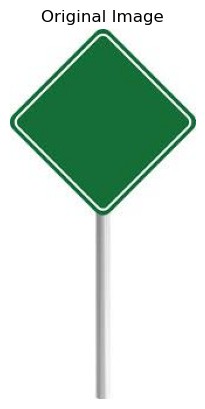

In [212]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
img = cv2.imread("go.jpg", cv2.IMREAD_COLOR)

# Convert BGR to RGB for correct display in Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the original image using Matplotlib
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")  # Hide axes for a clean display
plt.show()


# Part 2: Preprocessing - Convert to Grayscale

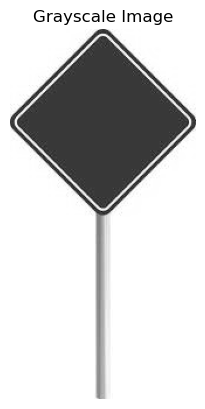

In [213]:
# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Display grayscale image
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")  # Hide axes
plt.show()


# Part 3: Preprocessing - Apply Gaussian Blur to Reduce Noise

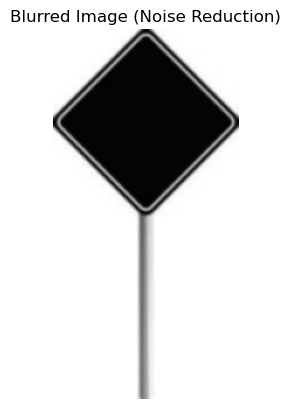

In [214]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Display blurred image
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image (Noise Reduction)")
plt.axis("off")  # Hide axes
plt.show()


# Part 4: Preprocessing - Implement Canny Edge Detection

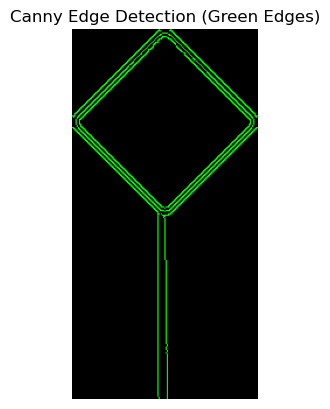

In [215]:
# Apply Canny Edge Detection
edges = cv2.Canny(blurred, 50, 150)

# Create an all-black image with the same shape as the original
edges_colored = np.zeros_like(img)

# Set the edges to green (BGR: [0, 255, 0] for green)
edges_colored[edges == 255] = [0, 255, 0]

# Display the edge-detected image with green edges
plt.imshow(cv2.cvtColor(edges_colored, cv2.COLOR_BGR2RGB))
plt.title("Canny Edge Detection (Green Edges)")
plt.axis("off")  # Hide axes
plt.show()



# Part 5: Detect Traffic Sign Shape, Color, Message

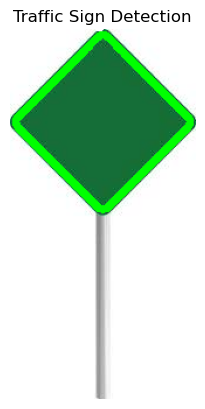

Detected Shape: Rectangle
Detected Color: Green
Message: GO


In [216]:
def detect_color(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Define color ranges
    red_lower1 = np.array([0, 100, 100])
    red_upper1 = np.array([10, 255, 255])
    red_lower2 = np.array([160, 100, 100])
    red_upper2 = np.array([180, 255, 255])
    yellow_lower = np.array([20, 100, 100])
    yellow_upper = np.array([30, 255, 255])
    green_lower = np.array([40, 50, 50])
    green_upper = np.array([90, 255, 255])
    
    # Create masks
    red_mask1 = cv2.inRange(hsv, red_lower1, red_upper1)
    red_mask2 = cv2.inRange(hsv, red_lower2, red_upper2)
    red_mask = red_mask1 + red_mask2
    yellow_mask = cv2.inRange(hsv, yellow_lower, yellow_upper)
    green_mask = cv2.inRange(hsv, green_lower, green_upper)
    
    # Determine color
    if np.any(red_mask):
        return "Red"
    elif np.any(yellow_mask):
        return "Yellow"
    elif np.any(green_mask):
        return "Green"
    else:
        return "Unknown"

def detect_shape(contour):
    approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
    sides = len(approx)
    
    if sides == 3:
        return "Triangle"
    elif sides == 4:
        return "Rectangle"
    elif sides == 6:
        return "Hexagon"
    elif sides > 4:
        return "Circle"
    else:
        return "Unknown"

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

message = "Unknown Sign"
shape_detected = "Unknown"
color_detected = "Unknown"

# Process detected contours
for contour in contours:
    if cv2.contourArea(contour) > 500:  # Filter small contours
        shape_detected = detect_shape(contour)
        color_detected = detect_color(img)
        
        # Draw contour
        cv2.drawContours(img, [contour], -1, (0, 255, 0), 2)
        
        # Display message based on color
        if color_detected == "Red":
            message = "STOP"
        elif color_detected == "Yellow":
            message = "BE READY"
        elif color_detected == "Green":
            message = "GO"
        else:
            message = "UNKNOWN SIGN"
        
        # Display text on image
        x, y, w, h = cv2.boundingRect(contour)
        cv2.putText(img, f"{shape_detected}, {message}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

# Convert BGR to RGB for Matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the final output
plt.imshow(img_rgb)
plt.title("Traffic Sign Detection")
plt.axis("off")
plt.show()

# Print detected shape, color, and message
print(f"Detected Shape: {shape_detected}")
print(f"Detected Color: {color_detected}")
print(f"Message: {message}")


# Part 6: Display Bounding Box for ROI and Save Processed Image

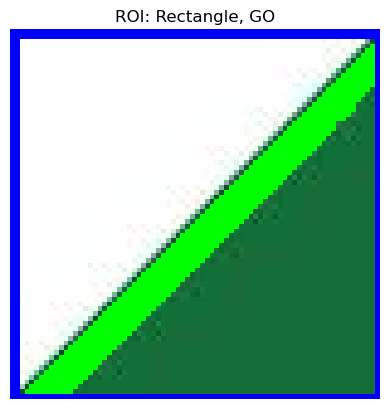

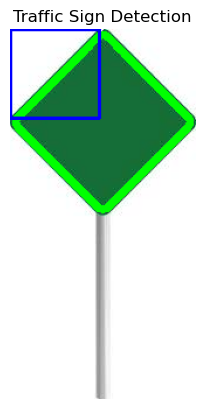

Detected Shape: Rectangle
Detected Color: Green
Message: GO


In [217]:
# Draw bounding box in blue color
x, y, w, h = cv2.boundingRect(contour)
cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue color (BGR format)

# Define Region of Interest (ROI) for the detected traffic sign
roi = img[y:y + h, x:x + w]
        
# Display the ROI
plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
plt.title(f"ROI: {shape_detected}, {message}")
plt.axis("off")
plt.show()

# Convert BGR to RGB for Matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show the final output
plt.imshow(img_rgb)
plt.title("Traffic Sign Detection")
plt.axis("off")
plt.show()

# Save the processed image
cv2.imwrite("processed_traffic_sign.png", img)

# Print detected shape, color, and message
print(f"Detected Shape: {shape_detected}")
print(f"Detected Color: {color_detected}")
print(f"Message: {message}")